# Titanic data

**Tarefa**: Prever a sobrevivência de um passageiro(a) dado sua classe de ticket, nome, gênero, idade, número de irmãos/cônjuges a bordo, número de pais/filhos a bordo, número do ticket, número da cabine e Porto de embarque.


## Parte I: Análise Exploratória de Dados
---

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Step 1: Carrega Base de Dados

In [2]:
#-----------------------------------------------------------
# Step 01: load data using panda
#-----------------------------------------------------------
train_df = pd.read_csv('Bases/Titanic_train.csv')  # train set
test_df  = pd.read_csv('Bases/Titanic_test.csv')   # test  set
combine  = [train_df, test_df]

## Step 2: Limpeza dos Dados

In [3]:
#-----------------------------------------------------------
# Step 02: Acquire and clean data
#-----------------------------------------------------------
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Training data statistics:

 - 891 training samples
 - Age, Cabin, Embarked: incomplete data
 - Data type:
      - object: Name, Sex, Ticket, Cabin, Embarked
      - int64: PassengerId, Survived, Pclass, SibSp, Parch
      - float64: Age, Fare
 - Survive rate: 0.383838

Estatísticas dos dados de treinamento:

- 891 amostras de treinamento
- Idade, Cabine, Embarque: dados incompletos
- Tipo de dados:
  - objeto: Nome, Sexo, Bilhete, Cabine, Embarque
  - int64: PassengerId, Sobreviveu, Classe, SibSp, Parch
  - float64: Idade, Tarifa
  - Taxa de sobrevivência: 0.383838

In [7]:
 # remove Features: Ticket, Cabin
#train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
#test_df  = test_df.drop(['Ticket', 'Cabin'], axis=1)
#combine  = [train_df, test_df]
# aplica a logica para ambos os datasets
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].fillna('U')
    dataset['Cabin'] = dataset.Cabin.str.extract('([A-Za-z])', expand=False)
    
for dataset in combine:
    dataset['Cabin'] = dataset['Cabin'].map( {'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E':0, 
                                            'F':0, 'G':0, 'T':0, 'U':1} ).astype(int)
    
train_df.head()
    

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1,S


In [8]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df  = test_df.drop(['Ticket'], axis=1)
combine  = [train_df, test_df]


# survival rate distribtion as a function of Pclass
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
# obtain Title from name (Mr, Mrs, Miss etc)
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)


for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Dona'],'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Mme'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle','Ms'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major','Rev'], 'Officer')
    dataset['Title'] = dataset['Title'].replace(['Jonkheer', 'Don','Sir'], 'Royalty')
    dataset.loc[(dataset.Sex == 'male')   & (dataset.Title == 'Dr'),'Title'] = 'Mr'
    dataset.loc[(dataset.Sex == 'female') & (dataset.Title == 'Dr'),'Title'] = 'Mrs'

#: count survived rate for different titles
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Title,Survived
3,Mrs,0.795276
1,Miss,0.702703
5,Royalty,0.600000
0,Master,0.575000
4,Officer,0.181818
2,Mr,0.158700


In [10]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,1,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,0,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,1,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,0,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,1,S,Mr


In [11]:
# Covert 'Title' to numbers (Mr->1, Miss->2 ...)
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty":5, "Officer": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

# Remove 'Name' and 'PassengerId' in training data, and 'Name' in testing data
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]

# if age < 16, set 'Sex' to Child
for dataset in combine:
    dataset.loc[(dataset.Age < 16),'Sex'] = 'Child'
    
# Covert 'Sex' to numbers (female:1, male:2)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0, 'Child': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,S,1
1,1,1,1,38.0,1,0,71.2833,0,C,3
2,1,3,1,26.0,0,0,7.9250,1,S,2
3,1,1,1,35.0,1,0,53.1000,0,S,3
4,0,3,0,35.0,0,0,8.0500,1,S,1


In [12]:
# Age distribution for different values of Pclass and gender
#grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
#grid.map(plt.hist, 'Age', bins=20)
#grid.add_legend()

In [13]:
# Guess age values using median values for age across set of Pclass and gender frature combinations
for dataset in combine:
    dataset['Age']=dataset.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean())).astype(int)

# create Age bands and determine correlations with Survived
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

C:\Users\esped\AppData\Local\Temp\ipykernel_7164\4175406704.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)


,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.339506
2,"(32.0, 48.0]",0.404444
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [14]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,0,1,1,0,7.2500,1,S,1
1,1,1,1,2,1,0,71.2833,0,C,3
2,1,3,1,1,0,0,7.9250,1,S,2
3,1,1,1,2,1,0,53.1000,0,S,3
4,0,3,0,2,0,0,8.0500,1,S,1


In [15]:
# Create family size from 'sibsq + parch + 1'
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

#create another feature called IsAlone
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[(dataset['FamilySize'] == 1), 'IsAlone'] = 1
    dataset.loc[(dataset['FamilySize'] > 4),  'IsAlone'] = 2

train_df[['IsAlone','Survived']].groupby(['IsAlone'], as_index=False).mean()

#drop Parch, SibSp, and FamilySize features in favor of IsAlone
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,1,S,1,0
1,1,1,1,2,71.2833,0,C,3,0
2,1,3,1,1,7.9250,1,S,2,1
3,1,1,1,2,53.1000,0,S,3,0
4,0,3,0,2,8.0500,1,S,1,1


In [16]:
# Create an artfical feature combinbing PClass and Age.
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [17]:
# fill the missing values of Embarked feature with the most common occurance
freq_port = train_df.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,1,0,1,0,3
1,1,1,1,2,71.2833,0,1,3,0,2
2,1,3,1,1,7.9250,1,0,2,1,3
3,1,1,1,2,53.1000,0,0,3,0,2
4,0,3,0,2,8.0500,1,0,1,1,6


In [18]:
# fill the missing values of Fare
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

# Create FareBand
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

# Convert the Fare feature to ordinal values based on the FareBand
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

C:\Users\esped\AppData\Local\Temp\ipykernel_7164\2165973158.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
C:\Users\esped\AppData\Local\Temp\ipykernel_7164\2165973158.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_df[['FareBand', 'Survived']].groupby([

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,1,0,1,0,3
1,1,1,1,2,3,0,1,3,0,2
2,1,3,1,1,1,1,0,2,1,3
3,1,1,1,2,3,0,0,3,0,2
4,0,3,0,2,1,1,0,1,1,6


In [19]:
train_df.describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,IsAlone,Age*Class
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.490460,1.332211,1.505051,0.771044,0.361392,1.711560,0.741863,2.785634
std,0.486592,0.836071,0.660838,0.822210,1.118148,0.420397,0.635673,1.036888,0.575364,1.755907
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,1.000000,0.500000,1.000000,0.000000,1.000000,0.000000,2.000000
50%,0.000000,3.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,1.000000,3.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000
max,1.000000,3.000000,2.000000,4.000000,3.000000,1.000000,2.000000,6.000000,2.000000,12.000000


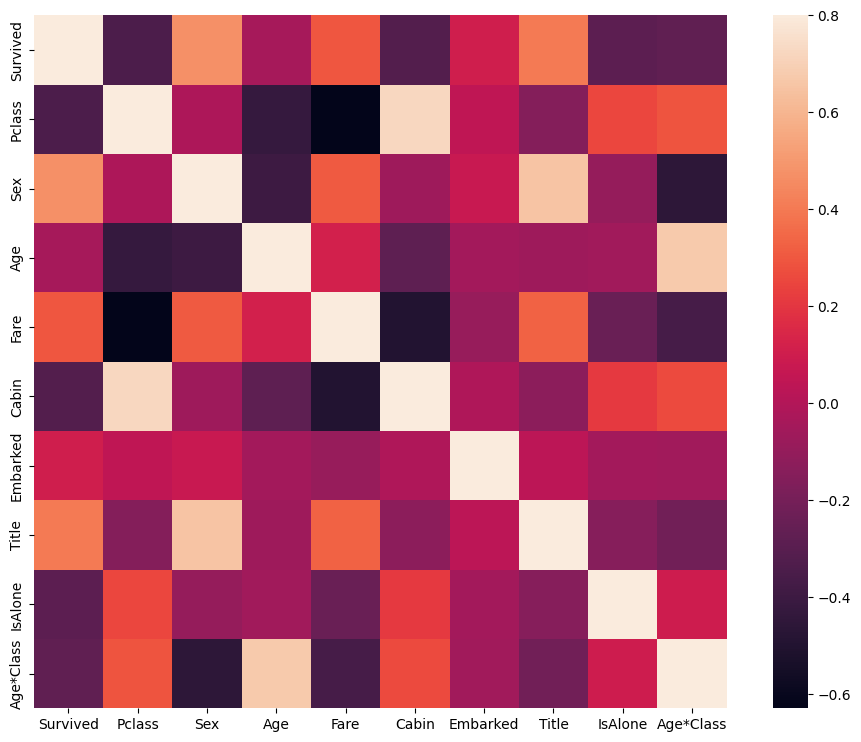

In [20]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(train_df.corr(), vmax=.8, square=True);

# Salvando as bases tratadas

In [21]:
train_df.to_csv('Bases_tratadas/Titanic_train_df.csv')
test_df.to_csv('Bases_tratadas/Titanic_test_df.csv')